# E-63 Big Data Analytics - Assignment 08 - TensorFlow

## Shanaka De Soysa

### Problem 1
Install newest release of TensorFlow 1.0.1 on the operating system of your choice. Use installation instructions on  https://www.tensorflow.org  site and instructions in the attached files:  install-mac-docket.md, install-mac-native.md, install-ubuntu.md and install-win-native.md.  Unless you know what you are doing do not install TensorFlow for GPU. Install TensorFlow for CPU. Use attach Jupyter notebook:  0_test_install.ipynb  to demonstrate that TensorFlow is properly installed. (10%)

#### Create a conda environment called tensorflow:
![conda env](img/create-tensorflow-env1.png "Create conda env")

#### Install tensorflow:
![](img/install-tensorflow1.png "Install tensorflow")

#### Use attach Jupyter notebook: 0_test_install.ipynb to demonstrate that TensorFlow is properly installed. 

This snippet of Python creates a simple graph.

In [1]:
import tensorflow as tf
hello = tf.constant('It works!')
sess = tf.Session()
print(sess.run(hello))

b'It works!'


Check that you have a recent version of TensorFlow installed, >= 0.12.0rc0

In [2]:
print("You have version %s" % tf.__version__)

You have version 1.0.1


We'll also use matplotlib, so let's test if that's working.

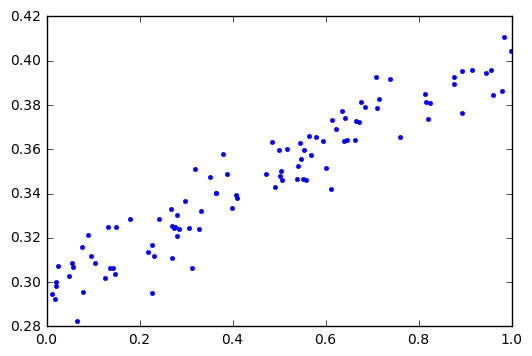

In [3]:
%matplotlib inline
import pylab
import numpy as np

# create some data using numpy. y = x * 0.1 + 0.3 + noise
x_train = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_train))
y_train = x_train * 0.1 + 0.3 + noise

# plot it
pylab.plot(x_train, y_train, '.')

### Problem 2.  
Construct a simple neural network (a network of logistic units) which will implement (X1 XOR X2) AND X3 function. Choose weights ( θi -s) of all dendritic inputs and bias inputs. Demonstrate that your network works by presenting the truth table. Present your network by a simple graph. You can produce the graph in any way convenient including pan and paper . (15%)

![](img\p2.jpg)

### Problem 3.  
Calculate the first 30 Fibonacci numbers using TensorFlow API and recurrence relationship:
Fn = Fn−1 + Fn−2 ,
with seed values: F0 = 0, F1 = 1.
To help you out, we are attaching Jupyter notebook entitled:  1_warm_up.ipynb  which contains Fibonacci calculation based on the products of 2x2 matrixes of the form
[0 1 1 1 ] . Export TensorFlow graph crated in this problem to a directory of your choice. Read and display that graph using TensorBoard tool. When starting the TensorBoard it appears that you need to specify the full directory path to the log directory, like:
C:\> tensorboard –-logdir=E:/code/output
(25%)


In [11]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)


with tf.Graph().as_default() as g:

    # Add code that will calculate and output the Fibonacci sequence
    # using TF. You will need to make use of tf.matmul() and
    # tf.assign() to perform the multiplications and assign the result
    # back to the variable fib_seq.

    fib_matrix = tf.constant([[0.0, 1.0],
                              [1.0, 1.0]])

    ### SOLUTION START ###
    # Put your solution code here.

    # Change this line to initialize fib_seq to a 2x1 TensorFlow
    # tensor *Variable* with the initial values of 0.0 and 1.0. Hint:
    # You'll need to make sure you specify a 2D tensor of shape 2x1,
    # not a 1D tensor. See fib_matrix above (a 2x2 2D tensor) to guide
    # you.
    fib_sequence = tf.Variable([[0.0], [1.0]])
    
    # Change this line to multiply fib_matrix and fib_sequence using tf.matmul()
    next_fib = tf.matmul(fib_matrix, fib_sequence)
    
    # And assign the result back to fig_sequence using tf.assign()
    assign_op = tf.assign(fib_sequence, next_fib)
    
    ### SOLUTION END ###
    
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        ##sess.run(init)
        writer = tf.summary.FileWriter("logs/fibonacci", sess.graph)
        sess.run(init)
        for step in range(30):
            sess.run(assign_op)
            print(sess.run(fib_sequence))
            
   # file_writer = tf.summary.FileWriter("output2", sess.graph)

[[ 1.]
 [ 1.]]
[[ 1.]
 [ 2.]]
[[ 2.]
 [ 3.]]
[[ 3.]
 [ 5.]]
[[ 5.]
 [ 8.]]
[[  8.]
 [ 13.]]
[[ 13.]
 [ 21.]]
[[ 21.]
 [ 34.]]
[[ 34.]
 [ 55.]]
[[ 55.]
 [ 89.]]
[[  89.]
 [ 144.]]
[[ 144.]
 [ 233.]]
[[ 233.]
 [ 377.]]
[[ 377.]
 [ 610.]]
[[ 610.]
 [ 987.]]
[[  987.]
 [ 1597.]]
[[ 1597.]
 [ 2584.]]
[[ 2584.]
 [ 4181.]]
[[ 4181.]
 [ 6765.]]
[[  6765.]
 [ 10946.]]
[[ 10946.]
 [ 17711.]]
[[ 17711.]
 [ 28657.]]
[[ 28657.]
 [ 46368.]]
[[ 46368.]
 [ 75025.]]
[[  75025.]
 [ 121393.]]
[[ 121393.]
 [ 196418.]]
[[ 196418.]
 [ 317811.]]
[[ 317811.]
 [ 514229.]]
[[ 514229.]
 [ 832040.]]
[[  832040.]
 [ 1346269.]]


Read and display that graph using TensorBoard tool. When starting the TensorBoard it appears that you need to specify the full directory path to the log directory

![](img\graph-run.png)

### Problem 4.  
Please examine attached Jupyter notebook  2_linear_regression.ipynb . As you are running its cells, the notebook will complain about non-existent API calls. This notebook was written in an earlier version of TensorFlow API and some calls changed their names. Fix all code by replacing older calls with calls in TF 1.0.1. Uncomment all optional (print) lines. Provide a copy of this notebook with all intermediate results and the image of TensorFlow graph as captured by the TensorBoard.
(20%)

In [65]:
# Import tensorflow and other libraries.
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf

import numpy as np
import math

%matplotlib inline
import pylab

In [66]:
sess = None
def resetSession():
    tf.reset_default_graph()
    global sess
    if sess is not None: sess.close()
    sess = tf.InteractiveSession()

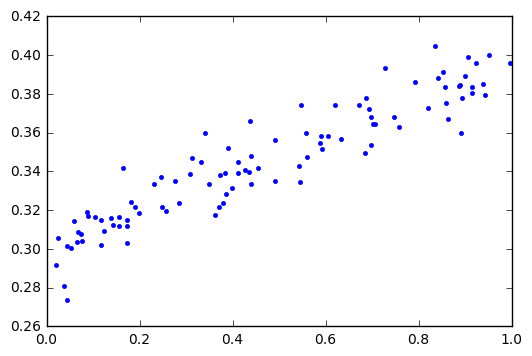

In [167]:
resetSession()

# Create input data using NumPy. y = x * 0.1 + 0.3 + noise
x_train = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_train))
y_train = x_train * 0.1 + 0.3 + noise

# Uncomment the following line to plot our input data.
pylab.plot(x_train, y_train, '.')

In [68]:
# Create some fake evaluation data
x_eval = np.random.rand(len(x_train)).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_train))
y_eval = x_eval * 0.1 + 0.3 + noise

In [69]:
# Build inference graph.
# Create Variables W and b that compute y_data = W * x_data + b
W = tf.Variable(tf.random_normal([1]), name='weights')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Uncomment the following lines to see what W and b are.
print(W)
print(b)

# Create a placeholder we'll use later to feed x's into the graph for training and eval.
# shape=[None] means we can put in any number of examples. 
# This is used for minibatch training, and to evaluate a lot of examples at once.
x = tf.placeholder(shape=[None], dtype=tf.float32, name='x')

# Uncomment this line to see what x is
print(x)

# This is the same as tf.add(tf.mul(W, x), b), but looks nicer
y = W * x + b

Tensor("weights/read:0", shape=(1,), dtype=float32)
Tensor("bias/read:0", shape=(1,), dtype=float32)
Tensor("x:0", shape=(?,), dtype=float32)


At this point, we have:
* x_train: x input features
* y_train: observed y for each x that we will train on
* x_eval, y_eval: Same as above, but a smaller set that we will not train on, and instead evaluate our effectiveness. 

In [70]:
# Write the graph so we can look at it in TensorBoard
# https://www.tensorflow.org/versions/r0.12/how_tos/summaries_and_tensorboard/index.html
sw = tf.summary.FileWriter('logs/regression', graph=tf.get_default_graph())

![](img\linear-graph-run.png)

In [71]:
# Create a placeholder we'll use later to feed the correct y value into the graph
y_label = tf.placeholder(shape=[None], dtype=tf.float32, name='y_label')
print (y_label)

Tensor("y_label:0", shape=(?,), dtype=float32)


In [72]:
# Build training graph.
loss = tf.reduce_mean(tf.square(y - y_label))  # Create an operation that calculates loss.
optimizer = tf.train.GradientDescentOptimizer(0.5)  # Create an optimizer.
train = optimizer.minimize(loss)  # Create an operation that minimizes loss.

# Uncomment the following 3 lines to see what 'loss', 'optimizer' and 'train' are.
print("loss:", loss)
print("optimizer:", optimizer)
print("train:", train)

loss: Tensor("Mean:0", shape=(), dtype=float32)
optimizer: <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x110d79fd0>
train: name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_weights/ApplyGradientDescent"
input: "^GradientDescent/update_bias/ApplyGradientDescent"



In [73]:
# Create an operation to initialize all the variables.
init = tf.initialize_all_variables()
print(init)
sess.run(init)

name: "init"
op: "NoOp"
input: "^weights/Assign"
input: "^bias/Assign"



In [74]:
# Uncomment the following line to see the initial W and b values.
print(sess.run([W, b]))

[array([-0.90465742], dtype=float32), array([ 1.08910704], dtype=float32)]


In [75]:
# Uncomment these lines to test that we can compute a y from an x (without having trained anything). 
# x must be a vector, hence [3] not just 3.
x_in = [3]
sess.run(y, feed_dict={x: x_in})

array([-1.62486529], dtype=float32)

In [76]:
def eval_loss():
    return sess.run(loss, feed_dict={x: x_eval, y_label: y_eval})
eval_loss()

0.171498

In [77]:
# Track of how loss changes, so we can visualize it in TensorBoard
tf.summary.scalar('loss', loss)
summary_op = tf.summary.merge_all(key='summaries')

In [78]:
# Perform training.
for step in range(201):
    # Run the training op; feed the training data into the graph
    summary_str, _ = sess.run([summary_op, train], feed_dict={x: x_train, y_label: y_train})
    sw.add_summary(summary_str, step)
    # Uncomment the following two lines to watch training happen real time.
    if step % 20 == 0:
        print(step, sess.run([W, b]))

0 [array([-0.98349649], dtype=float32), array([ 0.74135017], dtype=float32)]
20 [array([-0.20134732], dtype=float32), array([ 0.44152793], dtype=float32)]
40 [array([ 0.01452559], dtype=float32), array([ 0.34074017], dtype=float32)]
60 [array([ 0.07607785], dtype=float32), array([ 0.31200239], dtype=float32)]
80 [array([ 0.09362838], dtype=float32), array([ 0.3038083], dtype=float32)]
100 [array([ 0.09863263], dtype=float32), array([ 0.30147192], dtype=float32)]
120 [array([ 0.10005946], dtype=float32), array([ 0.30080575], dtype=float32)]
140 [array([ 0.10046633], dtype=float32), array([ 0.30061579], dtype=float32)]
160 [array([ 0.1005823], dtype=float32), array([ 0.30056164], dtype=float32)]
180 [array([ 0.10061537], dtype=float32), array([ 0.3005462], dtype=float32)]
200 [array([ 0.10062481], dtype=float32), array([ 0.30054179], dtype=float32)]


Track of how loss changes, so we can visualize it in TensorBoard:

![](img/linear-training.png)

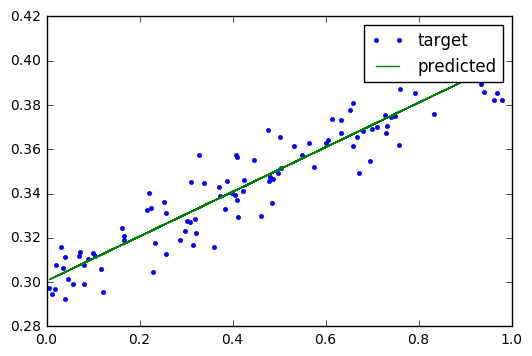

In [79]:
# Uncomment the following lines to plot the predicted values
pylab.plot(x_train, y_train, '.', label="target")
pylab.plot(x_train, sess.run(y, feed_dict={x: x_train, y_label: y_train}), label="predicted")
pylab.legend()

In [80]:
# Check accuracy on eval data after training
eval_loss()

0.00011249406

In [81]:
def predict(x_in): return sess.run(y, feed_dict={x: [x_in]})

In [82]:
# Save the model
saver = tf.train.Saver()
saver.save(sess, 'logs/regression/my_checkpoint.ckpt')

'logs/regression/my_checkpoint.ckpt'

In [83]:
# Current prediction
predict(3)

array([ 0.60241622], dtype=float32)

In [84]:
# Reset the model by running the init op again
sess.run(init) 

In [85]:
# Prediction after variables reinitialized
predict(3)

array([ 0.77394277], dtype=float32)

In [86]:
saver.restore(sess, 'logs/regression/my_checkpoint.ckpt')

In [87]:
# Predictions after variables restored
predict(3)

array([ 0.60241622], dtype=float32)

### Problem 5.  
Please considered attached Excel file called  Reduced_Car_Data.xlsx. This is the data set we used previously except that we have now removed several descriptive variables and left only:  Displacement, Horsepower and Weight . Please build a regression model using TensorFlow that will predict the gasoline consumption ( MPG - Miles Per Gallon ) of cars based on three remaining variables. Please extract a percentage of data to serve as a training set and a percentage to serve as the test set.   Please report on the accuracy of your model.
(30%)

In [151]:
# Import tensorflow and other libraries.
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline
import pylab
import pandas as pd

In [137]:
resetSession()

data_file = "/data/Reduced_Car_Data.csv"
COLUMNS = ["ID", "Displacement", "Horsepower", "Weight", "MPG"]
# Read the CSV
data = pd.read_csv(data_file, names=COLUMNS, skipinitialspace=True, skiprows=1, 
                   dtype={"Displacement":np.float32, "Horsepower":np.float32, "Weight":np.float32, "MPG":np.float32})
#print(data)
data.head()

,ID,Displacement,Horsepower,Weight,MPG
0,1,307.0,130.0,3504.0,18.0
1,2,350.0,165.0,3693.0,15.0
2,3,318.0,150.0,3436.0,18.0
3,4,304.0,150.0,3433.0,16.0
4,5,302.0,140.0,3449.0,17.0


Please extract a percentage of data to serve as a training set and a percentage to serve as the test set.

In [138]:
# 
train=data.sample(frac=0.8, random_state=200)
test=data.drop(train.index)
print(len(train))
print(len(test))

80
20


In [139]:
learning_rate = 0.01
training_epochs = 1000
cost_history = np.empty(shape=[1],dtype=float)

train_x = train[['Displacement', 'Horsepower', 'Weight']]
train_y = train[['MPG']]
test_x = test[['Displacement', 'Horsepower', 'Weight']]
test_y = test[['MPG']]

n_dim = train_x.shape[1]

X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,1])
W = tf.Variable(tf.ones([n_dim,1]))

init = tf.initialize_all_variables()


# Build inference graph.
# Create Variables W and b that compute y_data = W * x_data + b
#W = tf.Variable(tf.random_normal([1]), name='weights')
#b = tf.Variable(tf.random_normal([1]), name='bias')

# Uncomment the following lines to see what W and b are.
print(W)
print(b)

# Create a placeholder we'll use later to feed x's into the graph for training and eval.
# shape=[None] means we can put in any number of examples. 
# This is used for minibatch training, and to evaluate a lot of examples at once.
x = tf.placeholder(shape=[None], dtype=tf.float32, name='x')

# Uncomment this line to see what x is
print(x)

# This is the same as tf.add(tf.mul(W, x), b), but looks nicer
#y = tf.add(tf.matmul(X, W), b)


Tensor("Variable/read:0", shape=(3, 1), dtype=float32)
Tensor("bias/read:0", shape=(1,), dtype=float32)
Tensor("x:0", shape=(?,), dtype=float32)


In [140]:
y_ = tf.matmul(X, W)
cost = tf.reduce_mean(tf.square(y_ - Y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [141]:
# Write the graph so we can look at it in TensorBoard
# https://www.tensorflow.org/versions/r0.12/how_tos/summaries_and_tensorboard/index.html
sw = tf.summary.FileWriter('logs/regression_car', graph=tf.get_default_graph())

In [142]:
sess = tf.Session()
sess.run(init)

for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={X: train_x, Y: train_y})
    cost_history = np.append(
        cost_history,sess.run(
            cost,feed_dict={X: train_x, Y: train_y}))

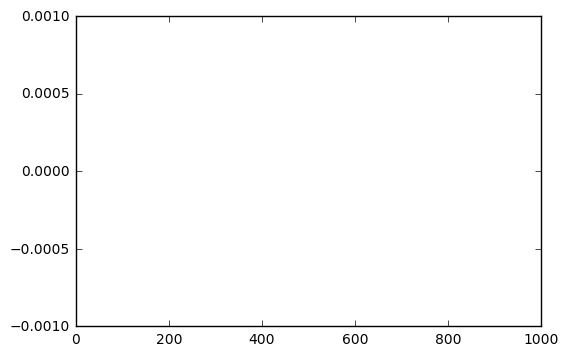

In [143]:
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

In [144]:
cost_history

array([             nan,   4.41304351e+17,   1.66342561e+28, ...,
                    nan,              nan,              nan])

In [145]:

pred_y = sess.run(y_, feed_dict={X: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse)) 

fig, ax = plt.subplots()
ax.scatter(test_y, pred_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

ValueError: Argument must be a dense tensor:     MPG
1   NaN
6   NaN
7   NaN
11  NaN
14  NaN
16  NaN
26  NaN
27  NaN
42  NaN
51  NaN
55  NaN
56  NaN
57  NaN
68  NaN
73  NaN
76  NaN
79  NaN
89  NaN
92  NaN
96  NaN - got shape [20, 1], but wanted [].

In [149]:
for y in test_y.columns:
    print(test_y[y].dtype)

float32


In [150]:
type(test_y)

pandas.core.frame.DataFrame

In [161]:
from numpy import genfromtxt


def read_dataset(filePath,delimiter=','):
    return genfromtxt(filePath, delimiter=delimiter)

car = read_dataset(filePath="data/Reduced_Car_Data.csv")
labels = np.array(car[4])


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [165]:
def read_car_data():
    car = read_dataset(filePath="data/Reduced_Car_Data.csv")
    features = np.array(car[,4])
    labels = np.array(car[,1:3])
    return features, labels

SyntaxError: invalid syntax (<ipython-input-165-4d9cc37882ed>, line 3)

In [163]:
features,labels = read_car_data()

In [164]:
features

array([    4.,   304.,   150.,  3433.,    16.])

In [166]:
car = read_dataset(filePath="data/Reduced_Car_Data.csv")
car


array([[             nan,              nan,              nan,
                     nan,              nan],
       [  1.00000000e+00,   3.07000000e+02,   1.30000000e+02,
          3.50400000e+03,   1.80000000e+01],
       [  2.00000000e+00,   3.50000000e+02,   1.65000000e+02,
          3.69300000e+03,   1.50000000e+01],
       [  3.00000000e+00,   3.18000000e+02,   1.50000000e+02,
          3.43600000e+03,   1.80000000e+01],
       [  4.00000000e+00,   3.04000000e+02,   1.50000000e+02,
          3.43300000e+03,   1.60000000e+01],
       [  5.00000000e+00,   3.02000000e+02,   1.40000000e+02,
          3.44900000e+03,   1.70000000e+01],
       [  6.00000000e+00,   4.29000000e+02,   1.98000000e+02,
          4.34100000e+03,   1.50000000e+01],
       [  7.00000000e+00,   4.54000000e+02,   2.20000000e+02,
          4.35400000e+03,   1.40000000e+01],
       [  8.00000000e+00,   4.40000000e+02,   2.15000000e+02,
          4.31200000e+03,   1.40000000e+01],
       [  9.00000000e+00,   4.5500000